# Why Python?

The history saving thread hit an unexpected error (OperationalError('attempt to write a readonly database')).History will not be written to the database.
Dataset Overview:

Total records: 100

Sales by Product:
           sum         mean  count
product                           
Laptop   55500  1353.658537     41
Phone    77900  2596.666667     30
Tablet   53300  1837.931034     29

Top Regions by Sales:
region
North    52600
South    46000
West     45900
East     42200
Name: sales, dtype: int64

High-value sales (>$3500): 30 transactions

Monthly Sales Trend:
month
1    51300
2    44400
3    63800
4    27200
Name: sales, dtype: int64


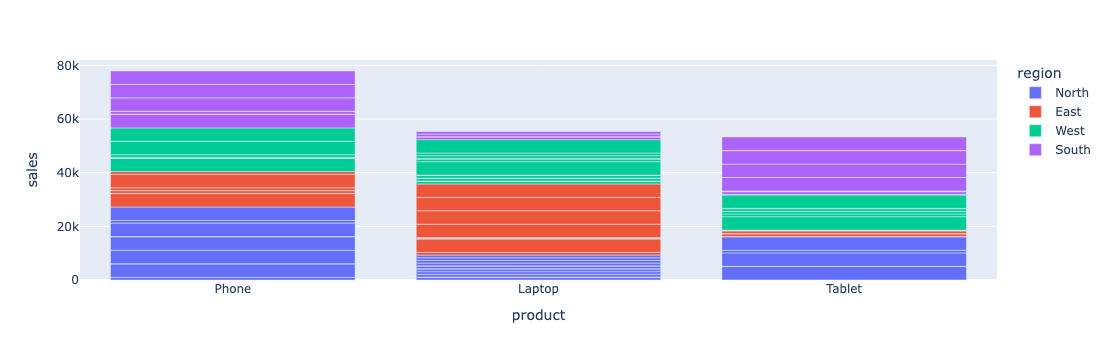

In [13]:
import pandas as pd
import random
import plotly.express as px

# Create sample sales data using random choices
product_choice = ['Laptop', 'Phone', 'Tablet']
sales_choice = [1000, 5000, 100]
region_choice = ['North', 'South', 'East', 'West']
data = {
    'date': pd.date_range('2024-01-01', periods=100, freq='D'),
    'product': random.choices(product_choice,k=100),
    'sales': random.choices(sales_choice,k=100),
    'region': random.choices(region_choice,k=100)
}

df = pd.DataFrame(data)

# Data analysis in just a few lines
print("Dataset Overview:")
# print(df.head())
print(f"\nTotal records: {len(df)}")

# Group by product and calculate statistics
product_stats = df.groupby('product')['sales'].agg(['sum', 'mean', 'count'])
print("\nSales by Product:")
print(product_stats)

# Find top performing regions
region_performance = df.groupby('region')['sales'].sum().sort_values(ascending=False)
print("\nTop Regions by Sales:")
print(region_performance)

# Filter data for high-value sales
high_value_sales = df[df['sales'] > 3500]
print(f"\nHigh-value sales (>$3500): {len(high_value_sales)} transactions")

# Time-based analysis
df['month'] = df['date'].dt.month
monthly_sales = df.groupby('month')['sales'].sum()
print("\nMonthly Sales Trend:")
print(monthly_sales)

fig = px.bar(
   df,
   x='product',
   y='sales',
   color='region'
)
fig.show()


